In [11]:
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import scipy.stats as stats

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [12]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

### Function

In [4]:
def correlation():
    df1 = pd.DataFrame({'x':x1, 'y':y1})
    # print(df1.x.corr(df1.y))
    r1, p1=stats.pearsonr(df1.x,df1.y)
    a1.append(r1)
    b1.append(p1)

### with trend

In [9]:
dataset1 = pd.read_csv('IR_NZ(1).csv')
dataset2 = pd.read_csv('5.3 SAM and SLP/SAM index(1).csv')


for j in range (1,11):
    
    X1 = dataset1.iloc[61:122, 1].values
    Y1 = dataset2.iloc[:, 1].values

    
    w = j
    
    x1 = np.convolve(X1, np.ones(w), 'valid') / w
    y1 = np.convolve(Y1, np.ones(w), 'valid') / w

    a1 = []
    b1 = []


    correlation()


    for i in range(1,21):

        X1 = dataset1.iloc[61:122-i, 1].values
        Y1 = dataset2.iloc[i:, 1].values


        x1 = np.convolve(X1, np.ones(w), 'valid') / w
        y1 = np.convolve(Y1, np.ones(w), 'valid') / w

        correlation()
        
    test = pd.DataFrame({'1deg':a1})

    test.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test)
    
    round(test,2).to_csv('5.3 SAM and SLP/correlation and lags (' + str(j) + ').csv')
    
    test = pd.DataFrame({'1deg':b1})

    test.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test)
    
    round(test,2).to_csv('5.3.1 SAM and SLP/p value and lags (' + str(j) + ').csv')

        1deg
0   0.560507
1   0.267152
2   0.101788
3   0.156976
4   0.164993
5   0.205593
6   0.088032
7  -0.021859
8   0.161322
9   0.220176
10  0.236935
11  0.196895
12  0.308922
13 -0.070517
14  0.187551
15  0.193154
16  0.145855
17 -0.001972
18 -0.032831
19 -0.037137
20  0.110828
        1deg
0   0.000003
1   0.039066
2   0.443012
3   0.239282
4   0.220011
5   0.128484
6   0.522750
7   0.875332
8   0.248494
9   0.116781
10  0.094124
11  0.170530
12  0.030791
13  0.633881
14  0.206805
15  0.198397
16  0.339062
17  0.989861
18  0.834451
19  0.815377
20  0.490300
        1deg
0   0.602739
1   0.443354
2   0.229064
3   0.214921
4   0.260608
5   0.244100
6   0.115041
7   0.038009
8   0.167562
9   0.309507
10  0.339293
11  0.364666
12  0.296454
13  0.138268
14  0.197202
15  0.308848
16  0.216715
17  0.039263
18 -0.074847
19 -0.033786
20 -0.023636
            1deg
0   3.471852e-07
1   4.367856e-04
2   8.370069e-02
3   1.083856e-01
4   5.239325e-02
5   7.249593e-02
6   4.074733e-01
7   7.

### without trend

In [10]:
dataset1 = pd.read_csv('IR_NZ_without_trend(1).csv')
dataset2 = pd.read_csv('5.3 SAM and SLP/SAM index_without_trend(1).csv')

for j in range (1,11):
    
    X1 = dataset1.iloc[:, 1].values
    Y1 = dataset2.iloc[:, 1].values

    
    w = j
    
    x1 = np.convolve(X1, np.ones(w), 'valid') / w
    y1 = np.convolve(Y1, np.ones(w), 'valid') / w

    a1 = []
    b1 = []


    correlation()


    for i in range(1,21):

        X1 = dataset1.iloc[:-i, 1].values
        Y1 = dataset2.iloc[i:, 1].values


        x1 = np.convolve(X1, np.ones(w), 'valid') / w
        y1 = np.convolve(Y1, np.ones(w), 'valid') / w

        correlation()
        
    test = pd.DataFrame({'1deg':a1})

    test.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test)
    
    round(test,2).to_csv('5.3 SAM and SLP/correlation and lags without trend(' + str(j) + ').csv')
    
    test = pd.DataFrame({'1deg':b1})

    test.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test)
    
    round(test,2).to_csv('5.3.1 SAM and SLP/p value and lags without trend(' + str(j) + ').csv')

        1deg
0   0.523060
1   0.108736
2  -0.122833
3  -0.045460
4  -0.048484
5  -0.009374
6  -0.170022
7  -0.308981
8  -0.017820
9   0.087804
10  0.128851
11  0.097339
12  0.270047
13 -0.188091
14  0.115413
15  0.111412
16  0.064401
17 -0.148624
18 -0.154707
19 -0.145395
20  0.046010
        1deg
0   0.000015
1   0.408235
2   0.354017
3   0.734721
4   0.720232
5   0.945336
6   0.214600
7   0.023005
8   0.899220
9   0.535935
10  0.367518
11  0.501278
12  0.060579
13  0.200460
14  0.439812
15  0.461037
16  0.674271
17  0.335627
18  0.321896
19  0.358240
20  0.775147
        1deg
0   0.559277
1   0.286251
2  -0.079155
3  -0.117954
4  -0.070375
5  -0.108306
6  -0.309209
7  -0.406639
8  -0.131113
9   0.138484
10  0.213923
11  0.296101
12  0.224652
13 -0.003583
14  0.061156
15  0.199453
16  0.047499
17 -0.192746
18 -0.293884
19 -0.197533
20 -0.104933
        1deg
0   0.000003
1   0.027956
2   0.554769
3   0.382196
4   0.606276
5   0.431232
6   0.022899
7   0.002515
8   0.354188
9   0.332477

### Plot

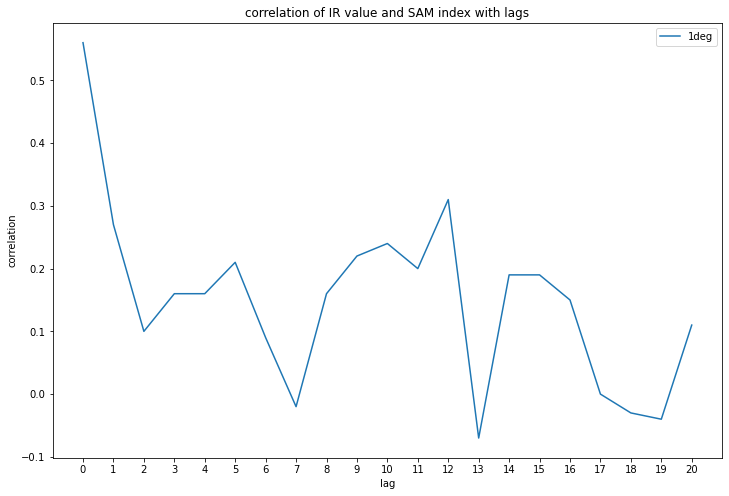

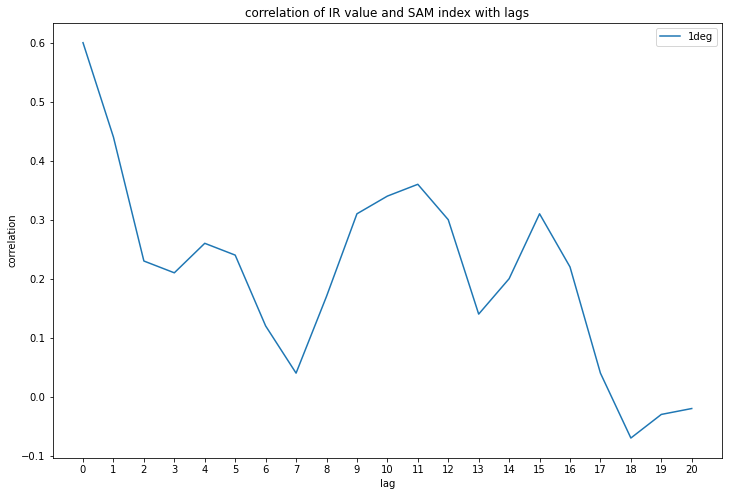

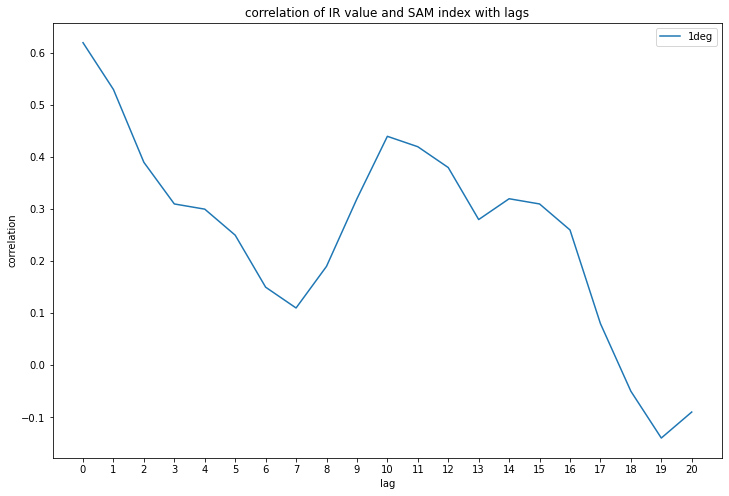

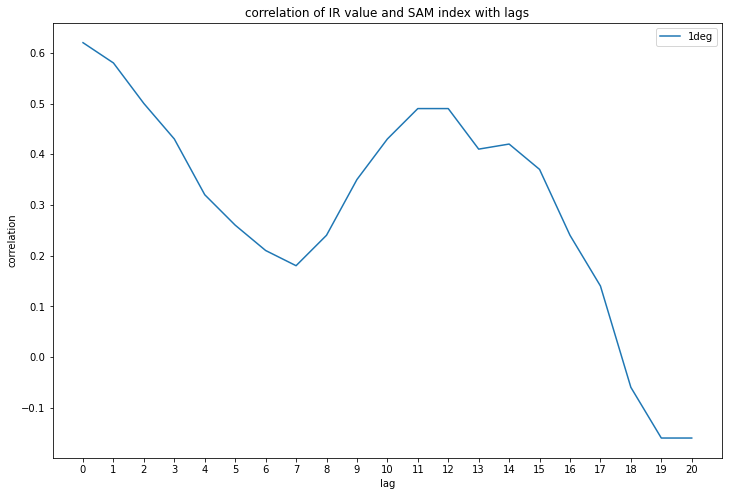

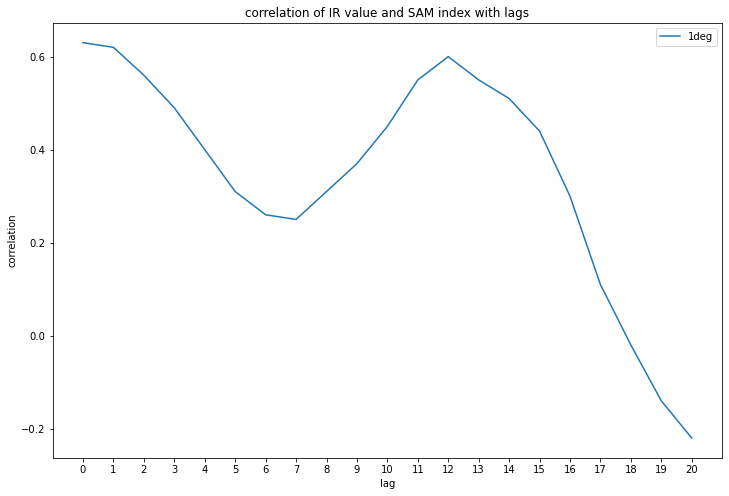

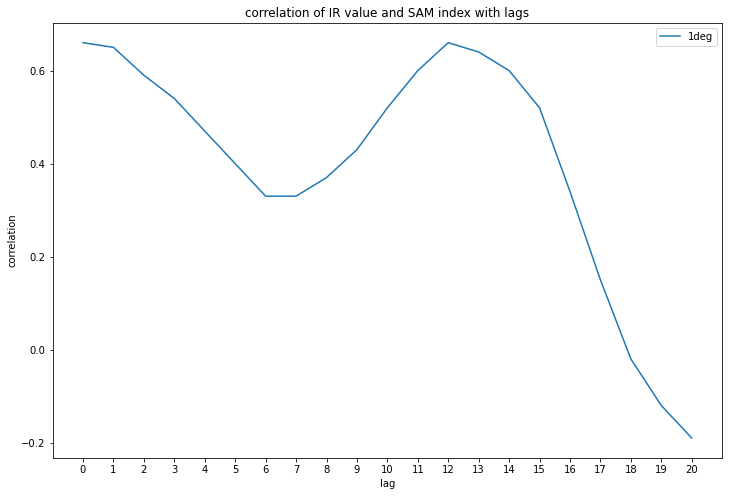

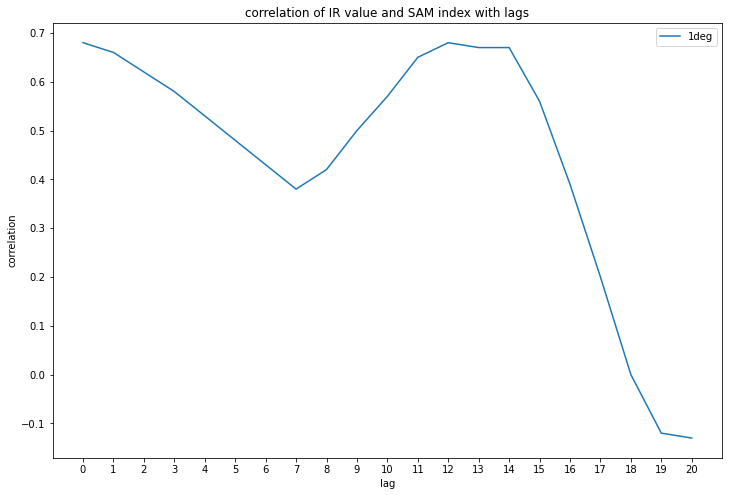

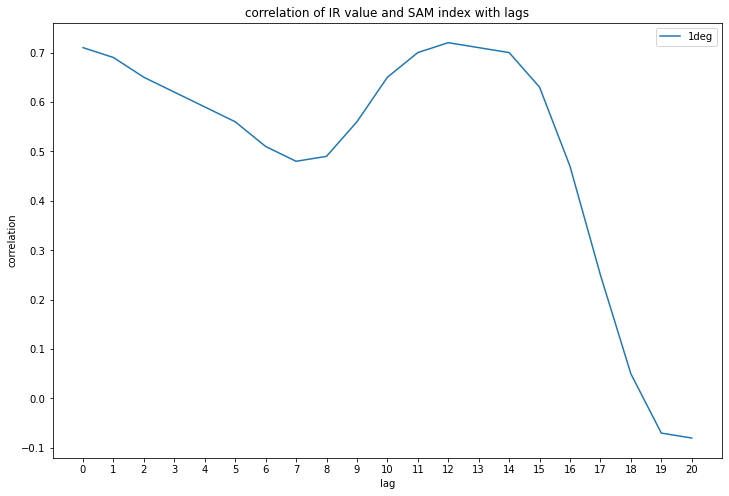

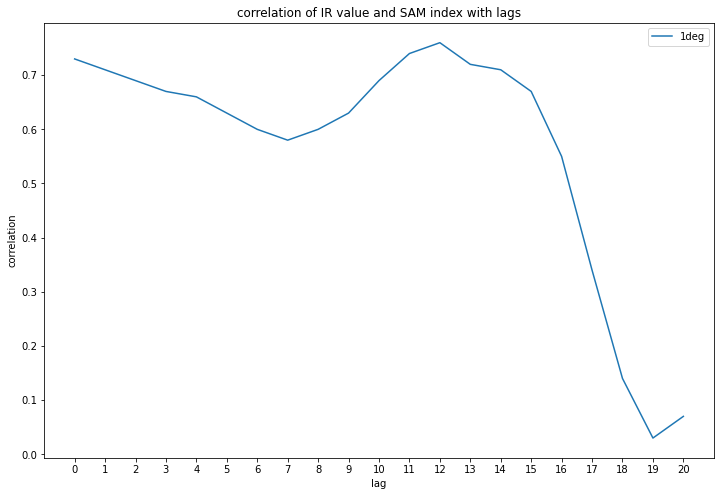

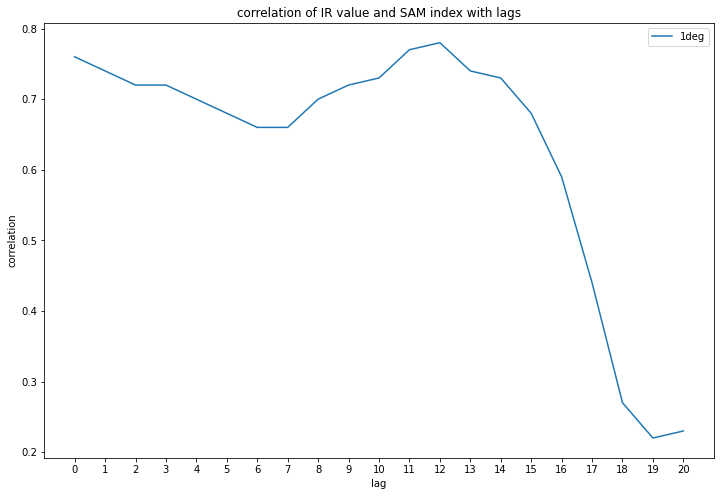

In [13]:
for j in range (1,11):
    
    x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    dataset = pd.read_csv('5.3 SAM and SLP/correlation and lags (' + str(j) + ').csv')
    # dataset = pd.read_csv('5.3 SAM and SLP/correlation and lags without trend(' + str(j) + ').csv')
    
    y1 = dataset.iloc[:, 1].values

    plt.figure(figsize(12,8))

    plt.plot(x,y1, label = '1deg')

    # plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
    plt.legend(loc=1)                        
    plt.xticks(x)
    plt.title('correlation of IR value and SAM index with lags')
    plt.xlabel('lag')
    plt.ylabel('correlation')

    savefigure('correlation and lag of ' + str(j) + '-year averaged') 

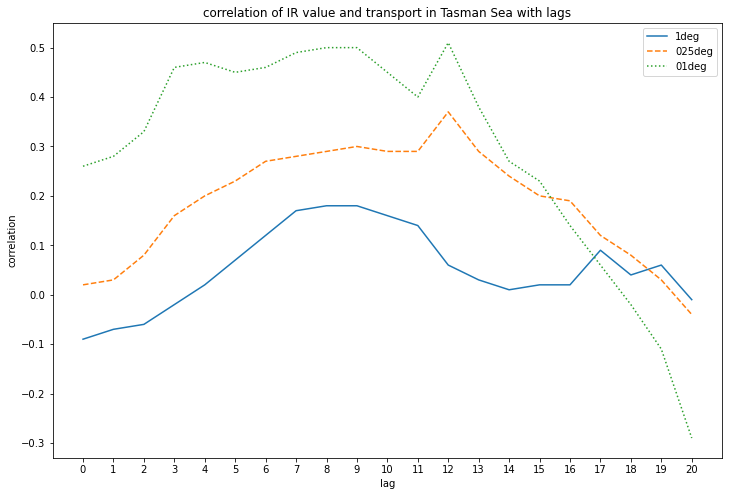